In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Data

In [17]:
no_of_ranges = np.array([1, 2, 538, 717, 1076], dtype=float)
secret_sizes = np.array([2873, 3133, 134525, 177765, 265421], dtype=float)

## Compute a best-fit line using np.polyfit (degree=1 for linear)

In [18]:
slope, intercept = np.polyfit(no_of_ranges, secret_sizes, 1)
print(f"Slope = {slope:.3f}, Intercept = {intercept:.3f}")

Slope = 244.270, Intercept = 2718.312


## Create a function for the fitted line

In [19]:
def line_of_best_fit(x):
    return slope * x + intercept

## Plot: data points and best-fit line

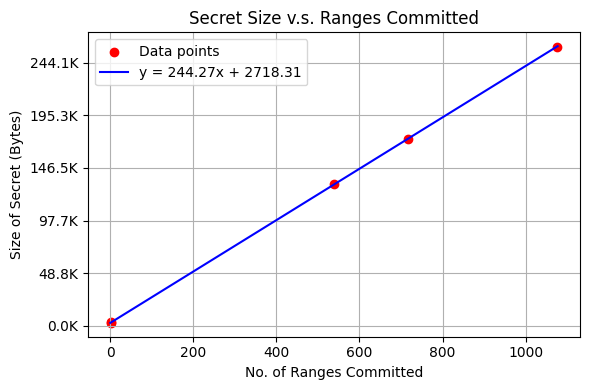

In [32]:
x_line = np.linspace(no_of_ranges.min() - 1, no_of_ranges.max() + 1, 100)
y_line = line_of_best_fit(x_line)

plt.figure(figsize=(6, 4))
plt.scatter(no_of_ranges, secret_sizes, color="red", label="Data points")

plt.plot(x_line, y_line, color="blue", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Secret Size v.s. Ranges Committed")
plt.ylabel("Size of Secret (Bytes)")
plt.xlabel("No. of Ranges Committed")
plt.legend()

# Access current axes and set a FuncFormatter
def bytes_to_kb(y, pos):
    # y is the tick value (in bytes)
    return f"{y / 1024:.1f}K"

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(bytes_to_kb))

plt.grid(True)
plt.tight_layout()


## Info
- Transcript of 1076 bytes (sent len: 226 bytes, recv len: 850 bytes)
- `No. of Ranges Committed (R)` are generated by different commit strategies:
  - Commit only to 2 ranges (request and response)
  - Commit to every single byte (1076 ranges)
  - Commit to every X byte
- `Size of Secret` is the size of the resulting secret file generated, which includes
  - Data that don't grow with increasing `R`, e.g. transcript itself, server cert info
  - Data that grows **linearly**: `EncodingTree`, which has
      - `MerkleTree`, where no. of leaves = `R`, hence total number of nodes scales in `O(R)`
      - `Vec<Blinder>`, where no. of blinder = `R`
      - `BiMap<usize, (Direction, Idx)>`, where `(Direction, Idx)` = ranges committed
- `Attestation` generated don't grow with increasing `R` as only the merkle root is committed